In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [3]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [5]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [3]:
df1=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1.Sex.drop_duplicates()) 
df1.Sex = le.transform(df1.Sex)
le.fit(df1.BP.drop_duplicates()) 
df1.BP = le.transform(df1.BP)
le.fit(df1.Cholesterol.drop_duplicates()) 
df1.Cholesterol = le.transform(df1.Cholesterol)
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [4]:
 from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(df1.Drug)
df1.Drug=label_encoder.transform(df1.Drug)
classes=label_encoder.classes_

Correlation 
                   Age       Sex        BP  Cholesterol   Na_to_K      Drug
Age          1.000000  0.102027  0.054212    -0.068234 -0.063119  0.041856
Sex          0.102027  1.000000 -0.007814    -0.008811 -0.125008  0.018239
BP           0.054212 -0.007814  1.000000    -0.137552 -0.149312  0.419397
Cholesterol -0.068234 -0.008811 -0.137552     1.000000  0.010000  0.048415
Na_to_K     -0.063119 -0.125008 -0.149312     0.010000  1.000000 -0.689051
Drug         0.041856  0.018239  0.419397     0.048415 -0.689051  1.000000 
 
 Pairplot


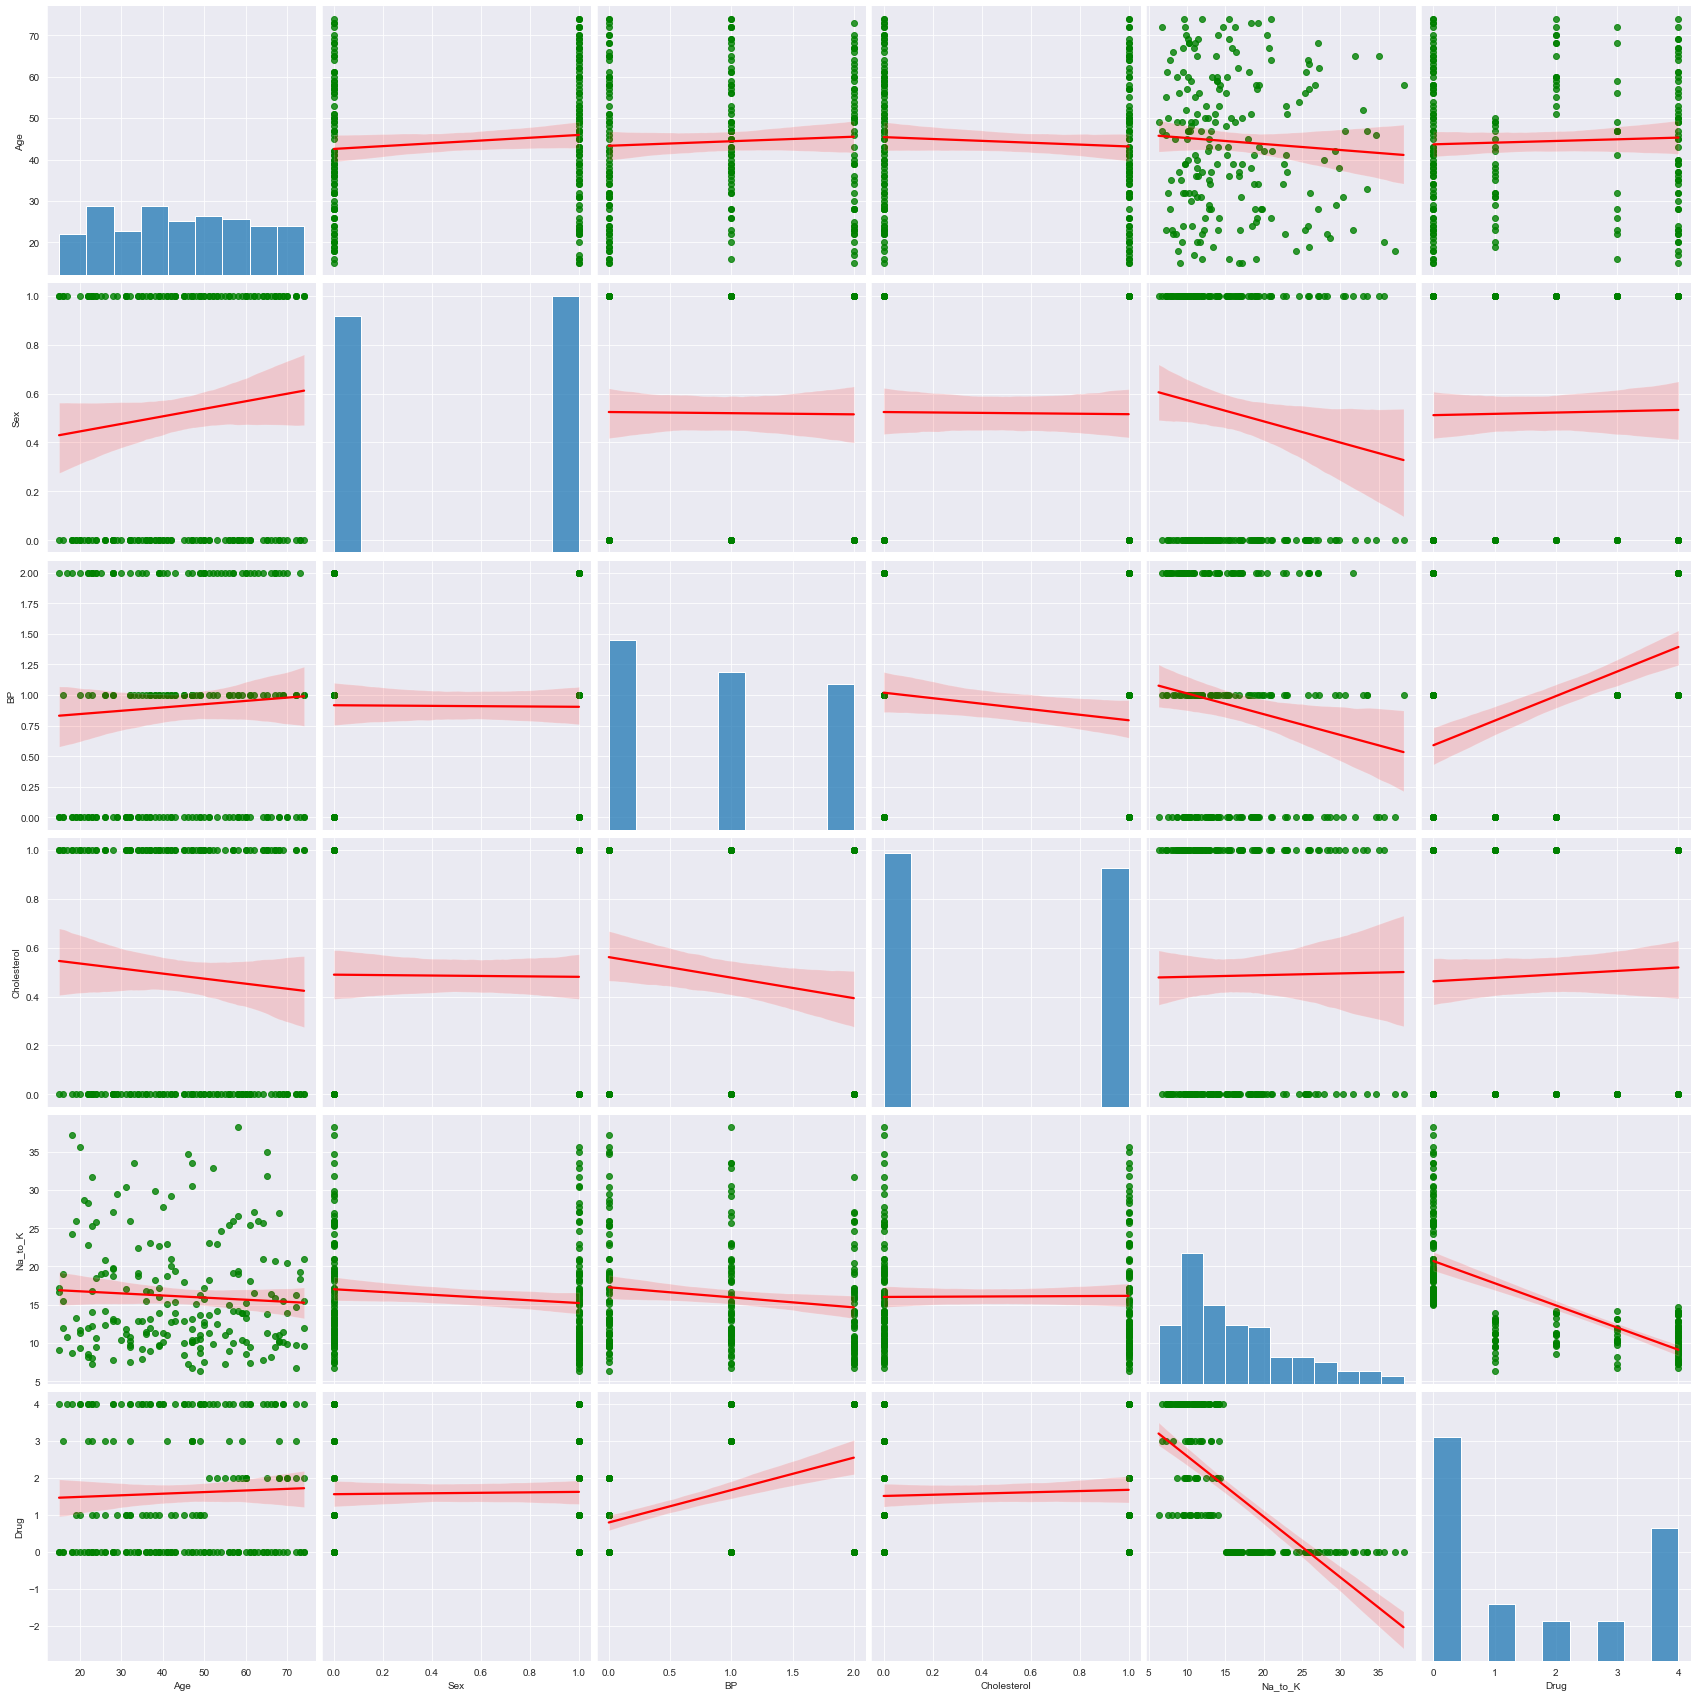

In [5]:
sns.set_style('darkgrid')
sns.pairplot(df1, kind='reg', plot_kws={'line_kws': {'color':'red'}, 'scatter_kws': {'color':'green'}}, height=4) 
print(f'Correlation \n', df1.corr(), '\n \n Pairplot')

In [ ]:
''' Analysis: The pairplot has been drawn. It clearly visible that there is the best correlation is available between Drug and
BP which is 0.419397. '''

In [6]:
from sklearn.model_selection import train_test_split

X = df1.drop("Drug", axis=1)
y = df1.Drug

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=4, random_state=45)
rf.fit(X_train, y_train)

# prediction
predict = rf.predict(X_test)

# result report
report = classification_report(y_test, predict)

print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [9]:
X_test.iloc[23]

Age            59.000
Sex             1.000
BP              0.000
Cholesterol     0.000
Na_to_K        13.935
Name: 85, dtype: float64

In [10]:
rf.predict(X_test.iloc[23].values.reshape(1, -1)) 

array([2])

In [11]:
y_test.iloc[23]

2

In [12]:
y_test.unique()

array([0, 4, 3, 1, 2])

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as pyplot
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF=OneVsRestClassifier(RandomForestClassifier(max_features=5))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

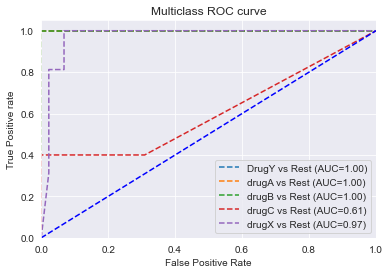

[2.         1.         0.97087379 0.97058824 0.9009009  0.875
 0.15454545 0.00917431 0.        ] [0.     0.3125 0.4375 0.625  0.8125 0.8125 1.     1.     1.    ] [0.         0.02272727 0.02272727 0.02272727 0.02272727 0.06818182
 0.06818182 0.31818182 1.        ]


In [14]:
from sklearn.preprocessing import label_binarize


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    pyplot.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
pyplot.plot([0,1],[0,1],'b--')
pyplot.xlim([0,1])
pyplot.ylim([0,1.05])
fpr, tpr, thresholds = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
pyplot.title('Multiclass ROC curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive rate')
pyplot.legend(loc='lower right')
plt.show()

print(thresholds, tpr, fpr)